In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
notas.columns = ['usuarioID', 'filmeID', 'nota', 'momento']
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [8]:
notas['nota'].mean()

3.501556983616962

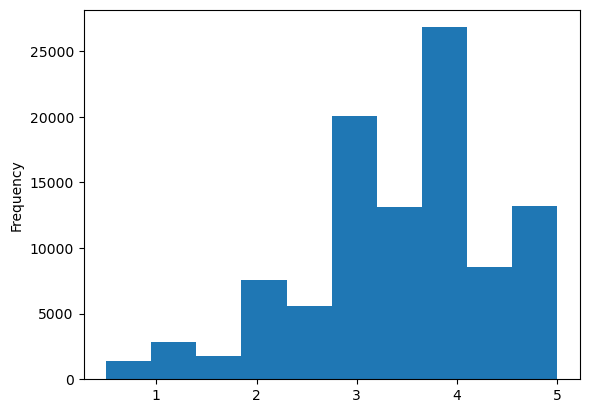

In [9]:
notas['nota'].plot(kind='hist');

In [10]:
notas['nota'].median()

3.5

In [11]:
mediana = notas['nota'].median()
media = notas['nota'].mean()
print(f'Mediana é {mediana}')
print(f'Média é {media}')

Mediana é 3.5
Média é 3.501556983616962


In [12]:
notas['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [13]:
import seaborn as sns

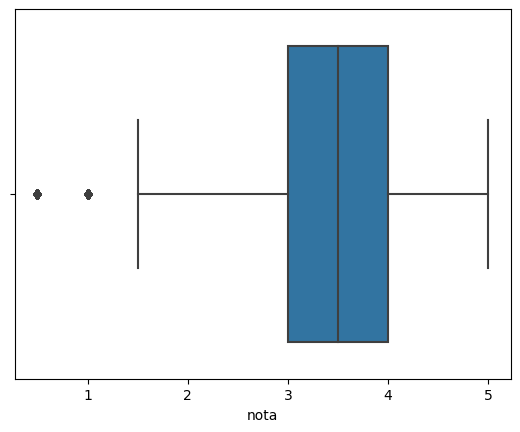

In [14]:
sns.boxplot(x=notas['nota']);

In [15]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv')
filmes.columns = ['filmesID', 'titulo', 'generos']
filmes.head()

,filmesID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
notas.query('filmeID==1')['nota'].mean()

3.9209302325581397

In [17]:
notas.query('filmeID==2')['nota'].mean()

3.4318181818181817

In [18]:
medias_por_filme = notas.groupby('filmeID')['nota'].mean()

In [19]:
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

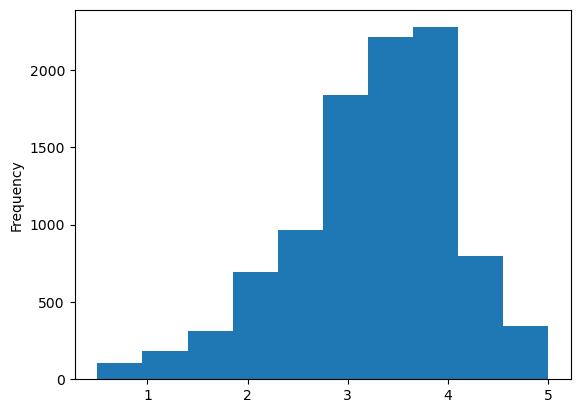

In [20]:
medias_por_filme.plot(kind='hist');

c:\Users\ary-r\anaconda3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

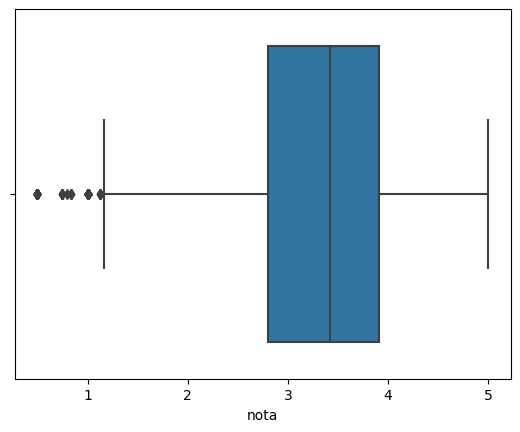

In [21]:
sns.boxplot(medias_por_filme)

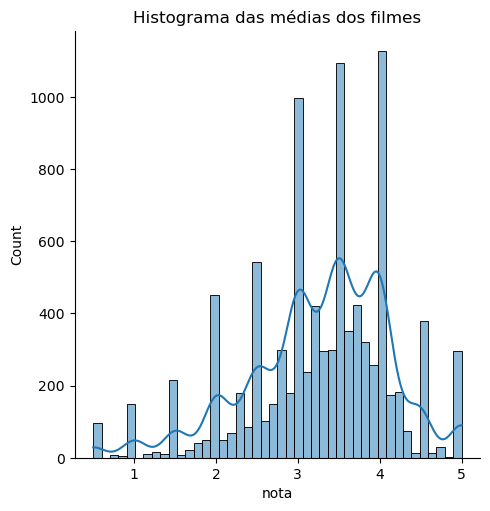

In [22]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde=True);
plt.title('Histograma das médias dos filmes');

In [23]:
tmdb = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


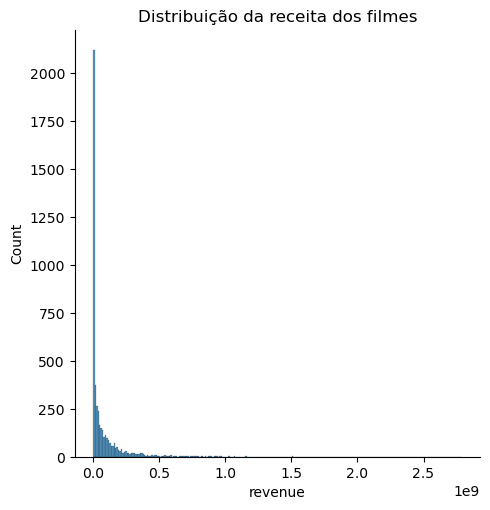

In [24]:
sns.displot(tmdb['revenue']);
plt.title('Distribuição da receita dos filmes');

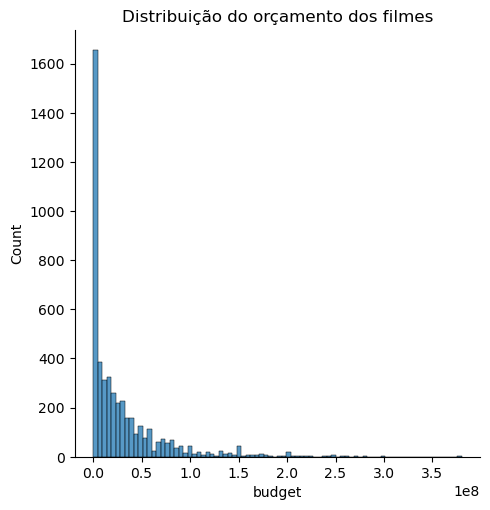

In [25]:
sns.displot(tmdb['budget']);
plt.title('Distribuição do orçamento dos filmes');

In [26]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [27]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [28]:
tmdb.query('revenue < 500')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",NaN,10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who's next?,Son of the Mask,3.6,338
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,10357,"[{""id"": 1552, ""name"": ""subway""}, {""id"": 2859, ...",en,Volcano,An earthquake shatters a peaceful Los Angeles ...,19.836124,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,0,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,The coast is toast,Volcano,5.2,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


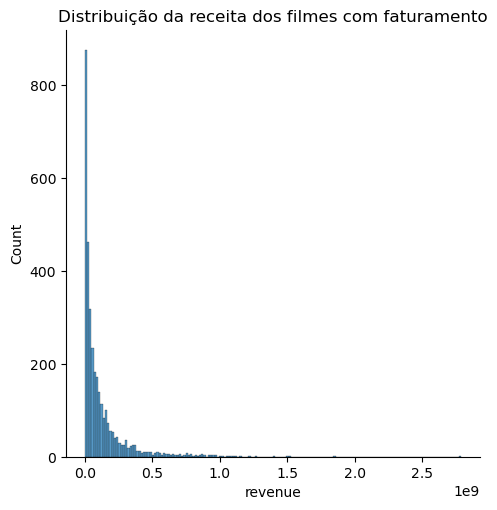

In [29]:
com_faturamento = tmdb.query('revenue > 0')
sns.displot(com_faturamento['revenue']);
plt.title('Distribuição da receita dos filmes com faturamento');

In [30]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [31]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

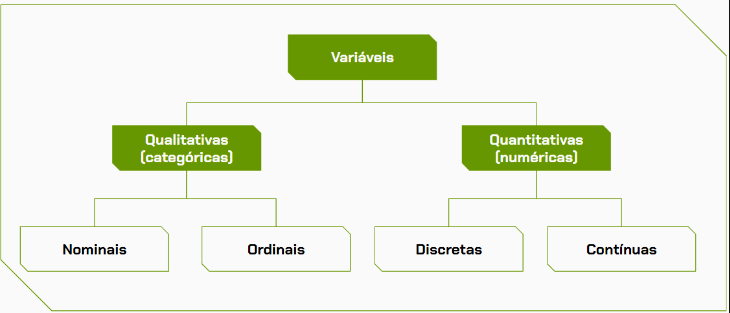

In [32]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [33]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

In [34]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


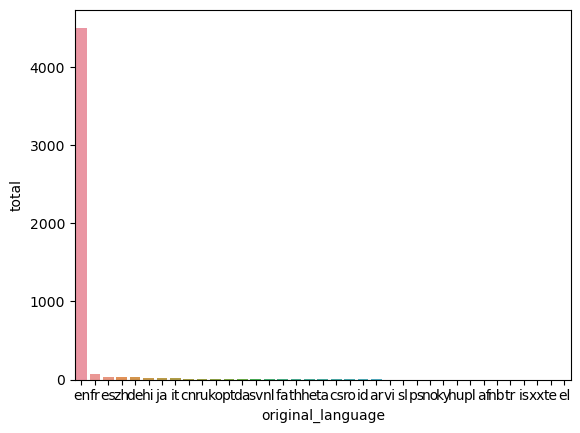

In [35]:
sns.barplot(data=contagem_de_lingua, x='original_language', y='total');

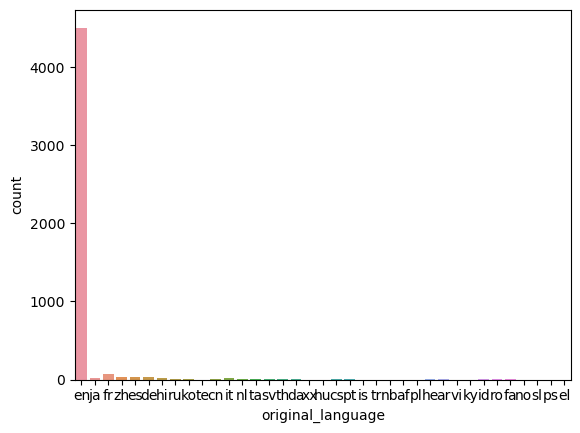

In [36]:
sns.countplot(data=tmdb, x='original_language');

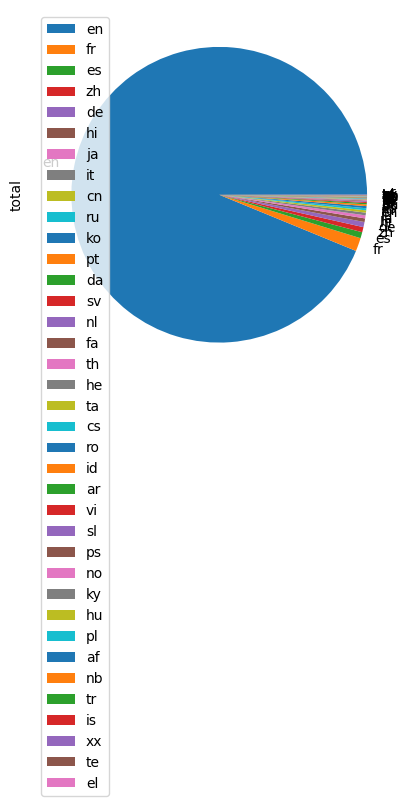

In [37]:
# Show de Horror
contagem_de_lingua.plot(kind='pie', y='total', labels=contagem_de_lingua['original_language']);

In [38]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_do_resto)

4803 4505 298


In [39]:
dados = {
    'lingua' : ['ingles', 'outras'],
    'total' : [total_de_ingles, total_do_resto]
}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outras,298


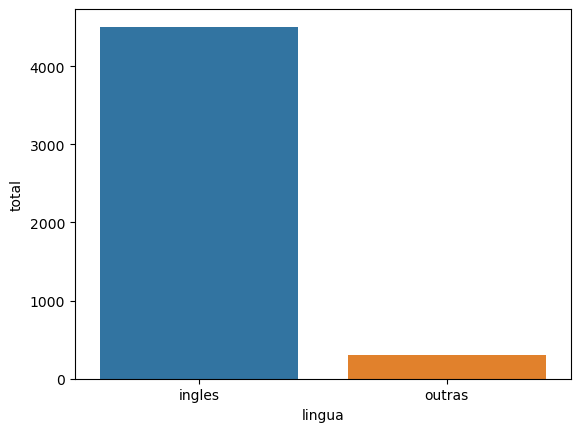

In [40]:
sns.barplot(data=dados, x='lingua', y='total');

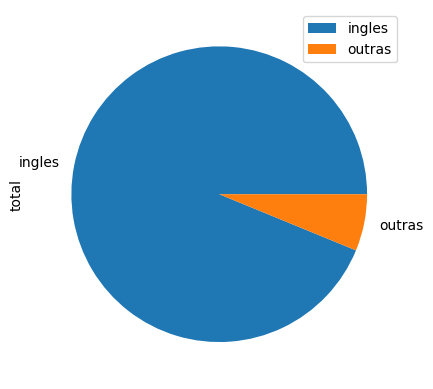

In [41]:
dados.plot(kind='pie', x='lingua', y='total', labels=dados['lingua']);

In [42]:
total_de_filmes_não_ingles = tmdb.query('original_language != "en"')['original_language'].value_counts()
total_de_filmes_não_ingles.head()

fr    70
es    32
zh    27
de    27
hi    19
Name: original_language, dtype: int64

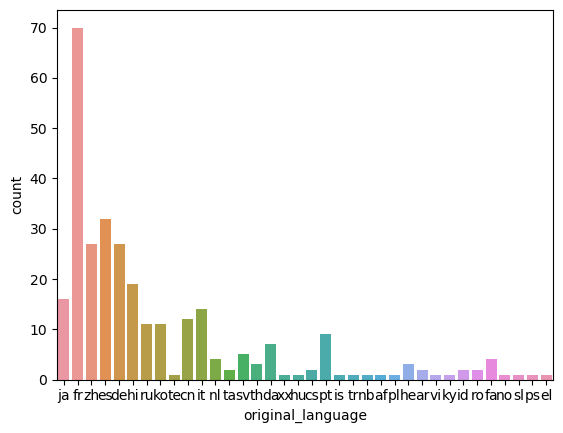

In [43]:
sns.countplot(data=tmdb.query('original_language != "en"'),
              x='original_language');

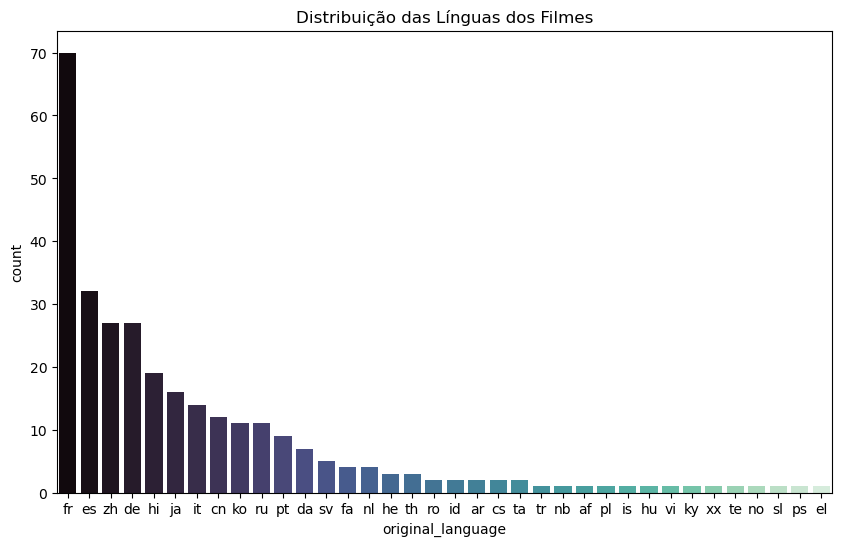

In [62]:
plt.figure(figsize=(10,6))
sns.countplot(data=tmdb.query('original_language != "en"'),
              x='original_language', 
              order=total_de_filmes_não_ingles.index,
              hue_order=total_de_filmes_não_ingles.index,
              palette='mako');
plt.title('Distribuição das Línguas dos Filmes')
plt.show()

In [45]:
sns.color_palette('mako')

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

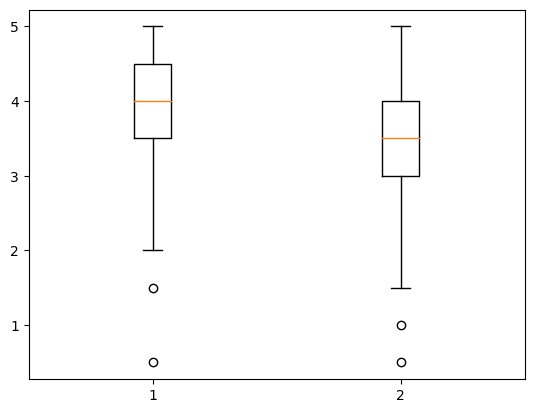

In [67]:
notas_toy_story = notas.query('filmeID==1')['nota']
notas_jumanji = notas.query('filmeID==2')['nota']

plt.boxplot([notas_toy_story, notas_jumanji])
plt.show()

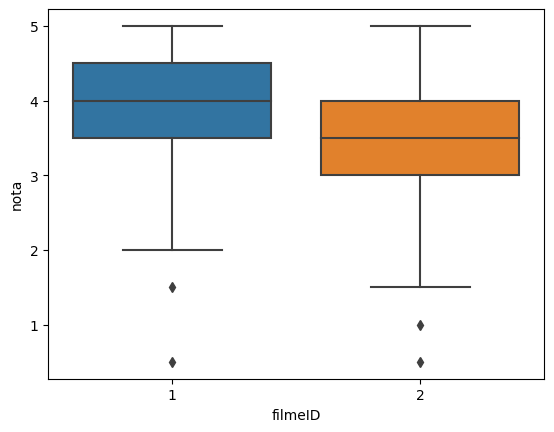

In [75]:
sns.boxplot(data=notas.query('filmeID in [1,2]'),
            x='filmeID',
            y='nota');

In [77]:
notas.groupby('filmeID').count().query('nota == 1')

,usuarioID,nota,momento
filmeID,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/bibliotecas_visualizacao/main/Dados/imigrantes_canada.csv')
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [64]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

Index(['País', 'Continente', 'Região', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', 'Total'],
      dtype='object')

In [65]:
df.set_index('País', inplace=True)

In [66]:
df.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [67]:
anos = list(map(str, range(1980, 2014)))

In [68]:
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [69]:
brasil = df.loc['Brasil', anos]

In [70]:
brasil

1980     211
1981     220
1982     192
1983     139
1984     145
1985     130
1986     205
1987     244
1988     394
1989     650
1990     650
1991     877
1992    1066
1993     866
1994     566
1995     572
1996     586
1997     591
1998     531
1999     626
2000     845
2001     847
2002     745
2003     839
2004     917
2005     969
2006    1181
2007    1746
2008    2138
2009    2509
2010    2598
2011    1508
2012    1642
2013    1714
Name: Brasil, dtype: object

In [71]:
brasil_dict = {'Ano': brasil.index.tolist(), 'Imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)

In [72]:
dados_brasil.head()

,Ano,Imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


In [73]:
import matplotlib.pyplot as plt

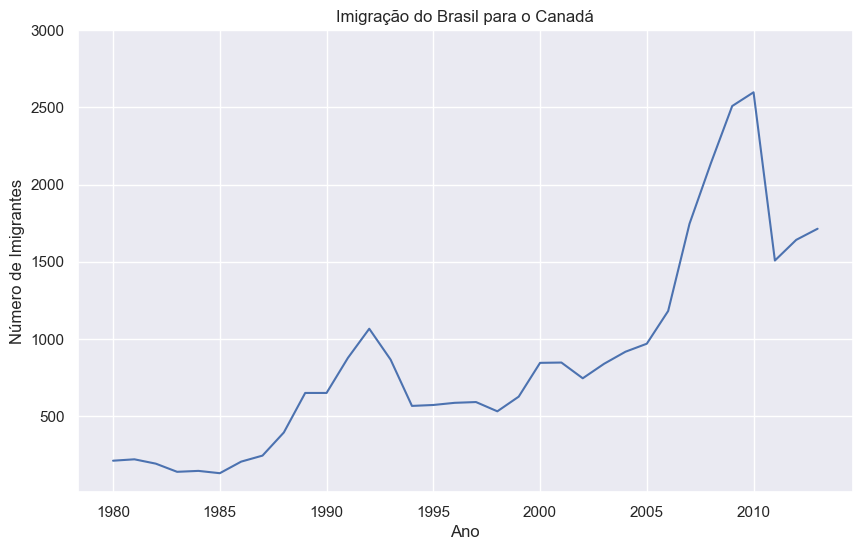

In [74]:
plt.figure(figsize=(10,6))
plt.title('Imigração do Brasil para o Canadá')
plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')
plt.plot(dados_brasil['Ano'], dados_brasil['Imigrantes'])
plt.xticks(['1980','1985', '1990', '1995', '2000', '2005', '2010'])
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])
plt.show()

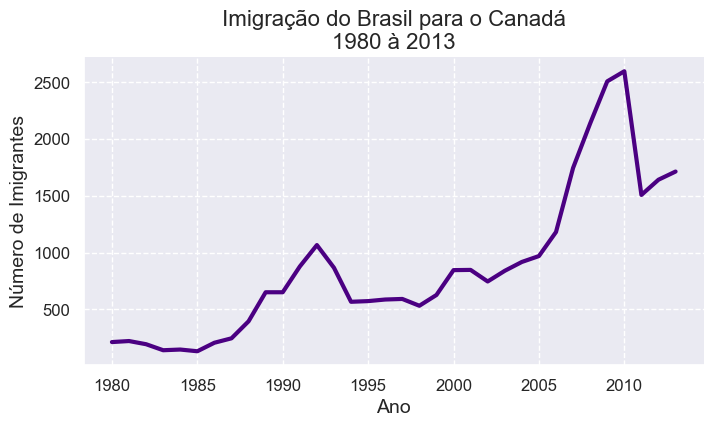

In [75]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['Ano'], dados_brasil['Imigrantes'], lw=3, color='indigo')
ax.set_title('Imigração do Brasil para o Canadá\n1980 à 2013', fontsize=16)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de Imigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linestyle='--')
plt.show()

In [76]:
IPython_default = plt.rcParams.copy()

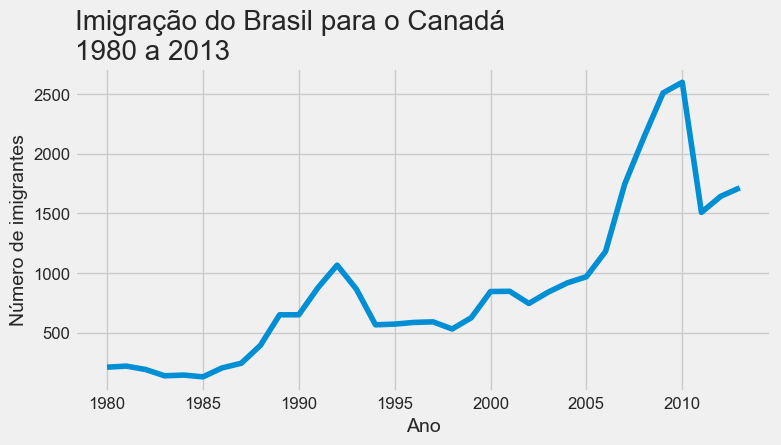

In [77]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(dados_brasil['Ano'], dados_brasil['Imigrantes'])
    ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=20, loc='left')
    ax.set_ylabel('Número de imigrantes', fontsize=14)
    ax.set_xlabel('Ano', fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    plt.show()

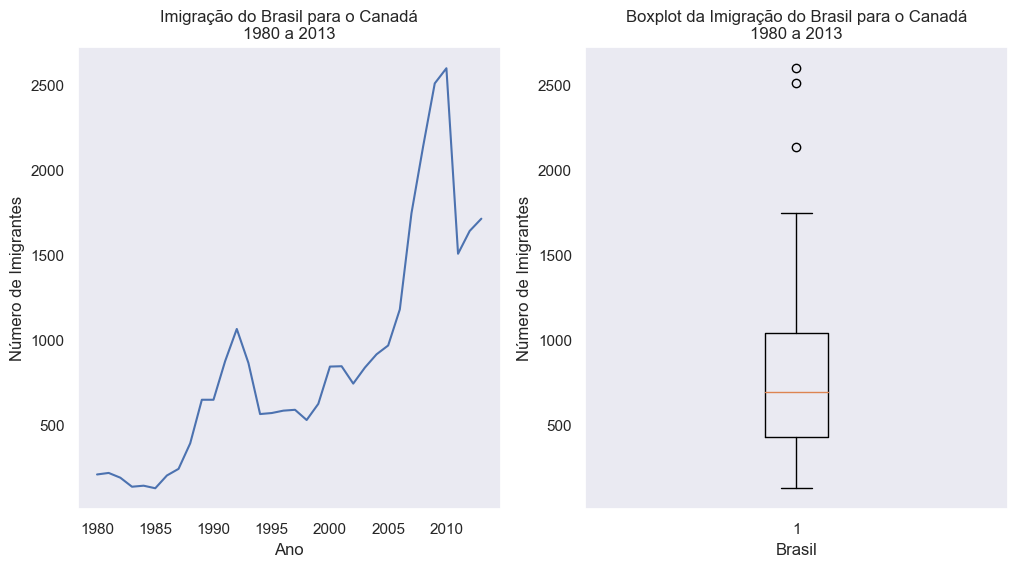

In [78]:
fig, axs = plt.subplots(1,2, figsize=(12,6))

axs[0].plot(dados_brasil['Ano'], dados_brasil['Imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de Imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5)) # Faz o eixo X ficar de 5 em 5 anos
axs[0].grid()


axs[1].boxplot(dados_brasil['Imigrantes'])
axs[1].set_title('Boxplot da Imigração do Brasil para o Canadá\n1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de Imigrantes')
axs[1].grid()


plt.show()

In [79]:
dados_brasil.describe()

,Imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


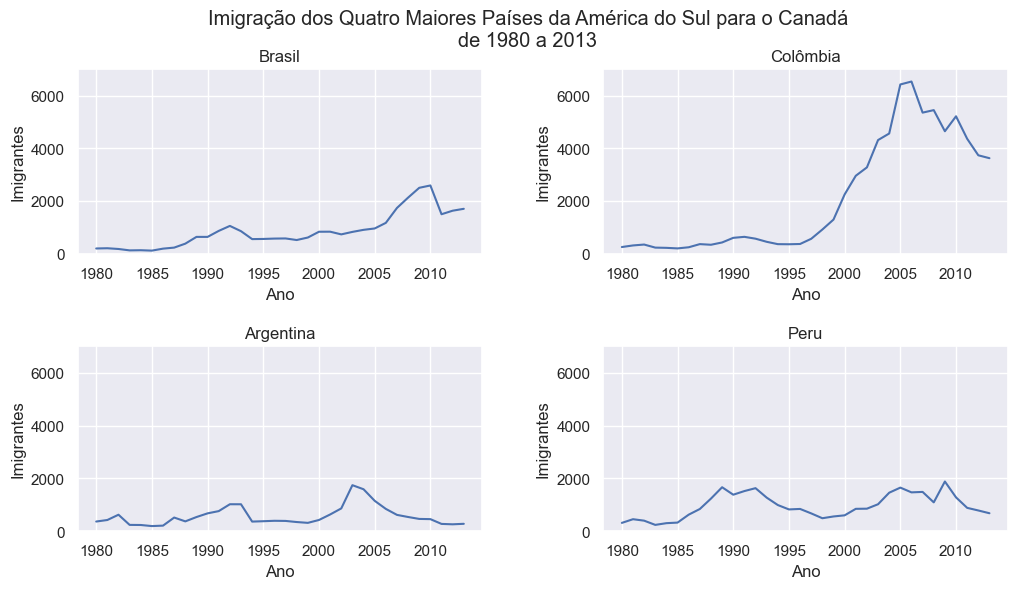

In [80]:
fig, axs = plt.subplots(2,2, figsize=(12,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Deixar separadinho em espaçamento vertical e horizontal
fig.suptitle('Imigração dos Quatro Maiores Países da América do Sul para o Canadá\nde 1980 a 2013')

axs[0,0].plot(df.loc['Brasil', anos])
axs[0,0].set_title('Brasil')

axs[0,1].plot(df.loc['Colômbia', anos])
axs[0,1].set_title('Colômbia')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

for ax in axs.flat: # Loop para fazer todos os eixos x ficarem de 5 em 5 anos
    ax.xaxis.set_major_locator(plt.MultipleLocator(5)) 
    
for ax in axs.flat: # Loop para colocar rótulo em todos os eixos dos plots
    ax.set_xlabel('Ano')
    ax.set_ylabel('Imigrantes')
    
ymin = 0
ymax= 7000

for ax in axs.ravel():
    ax.set_ylim(ymin, ymax) # Definindo o limite inferior e superior para todos

plt.show()

In [81]:
america_sul = df.query('Região == "América do Sul"')
america_sul.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [82]:
america_sul_sorted = america_sul.sort_values('Total', ascending=True)

In [83]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'indigo', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

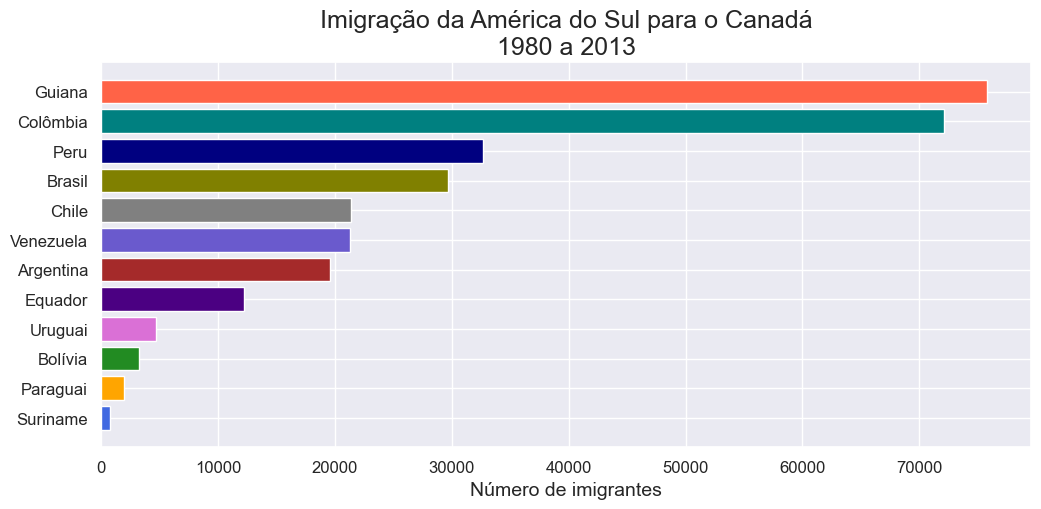

In [84]:
fig, ax = plt.subplots(figsize=(12,5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

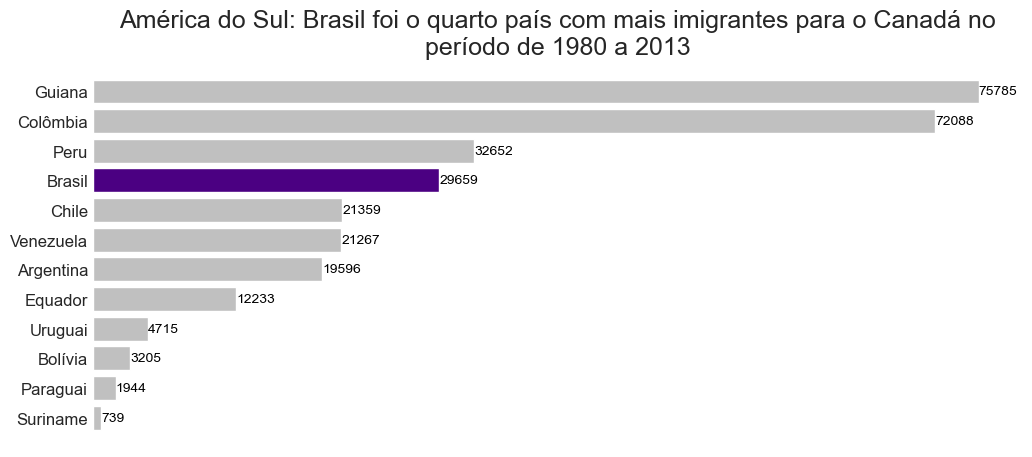

In [85]:
# Destacando o Brasil
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Brasil':
        cores.append('indigo')
    else:
        cores.append('silver')

fig, ax = plt.subplots(figsize=(12,5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes para o Canadá no\nperíodo de 1980 a 2013', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

for i, valor in enumerate(america_sul_sorted['Total']):
    ax.text(valor + 20, i, str(valor), color='black', fontsize=10, ha='left', va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.show()

In [86]:
import seaborn as sns

In [87]:
sns.set_theme()

In [89]:
top_10 = df.sort_values('Total', ascending=False).head(10)
top_10

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Índia,Ásia,Sul da Ásia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Ásia,Ásia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido e Irlanda do Norte,Europa,Norte da Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Ásia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Paquistão,Ásia,Sul da Ásia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos da América,América do Norte,América do Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irã,Ásia,Sul da Ásia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Ásia,Sul da Ásia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
República da Coreia,Ásia,Ásia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


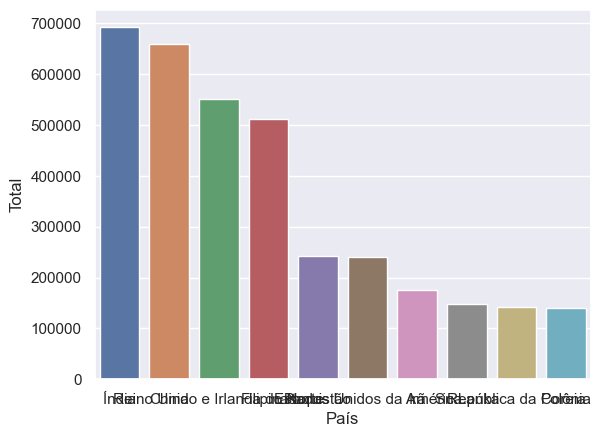

In [100]:
sns.barplot(data=top_10, x=top_10.index, y='Total');

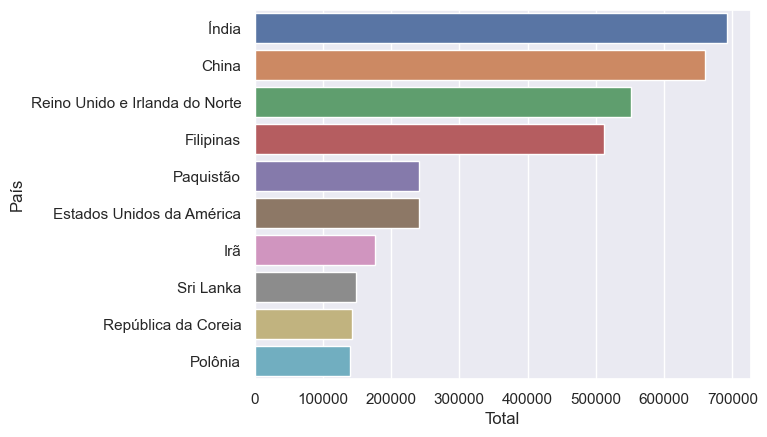

In [95]:
sns.barplot(data=top_10, x='Total', y=top_10.index, orient='h');

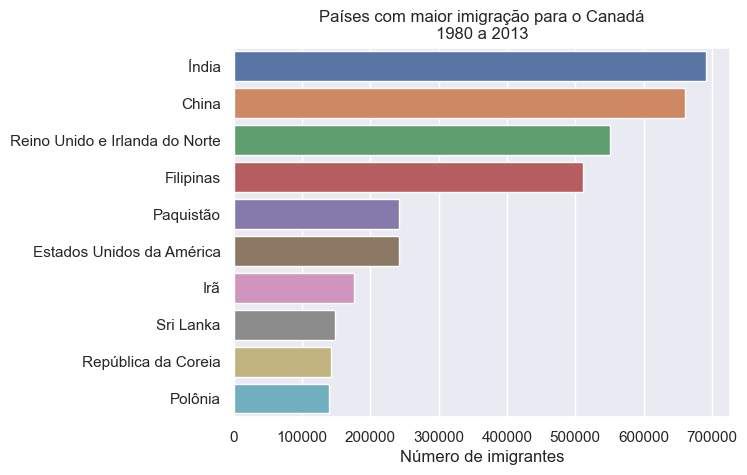

In [98]:
ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

ax.set(title='Países com maior imigração para o Canadá\n1980 a 2013',
       xlabel='Número de imigrantes',
       ylabel='')

plt.show()

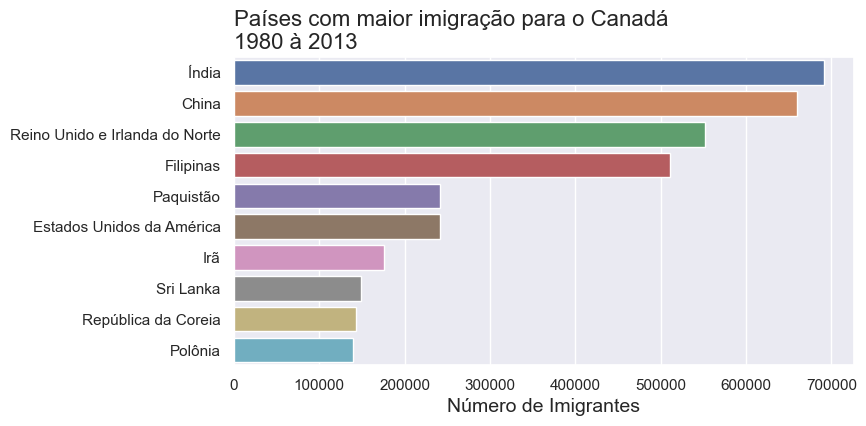

In [105]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

ax.set_title('Países com maior imigração para o Canadá\n1980 à 2013', fontsize=16, loc='left')
ax.set_xlabel('Número de Imigrantes', fontsize=14)
ax.set_ylabel('')
plt.show()

In [119]:
def gerar_paleta(palette):
    fig, ax = plt.subplots(figsize=(8,4))
    ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)
    ax.set_title('Países com maior imigração para o Canadá\n1980 à 2013', fontsize=16)
    ax.set_xlabel('Número de Imigrantes', fontsize=14)
    ax.set_ylabel('')
    
    plt.show()

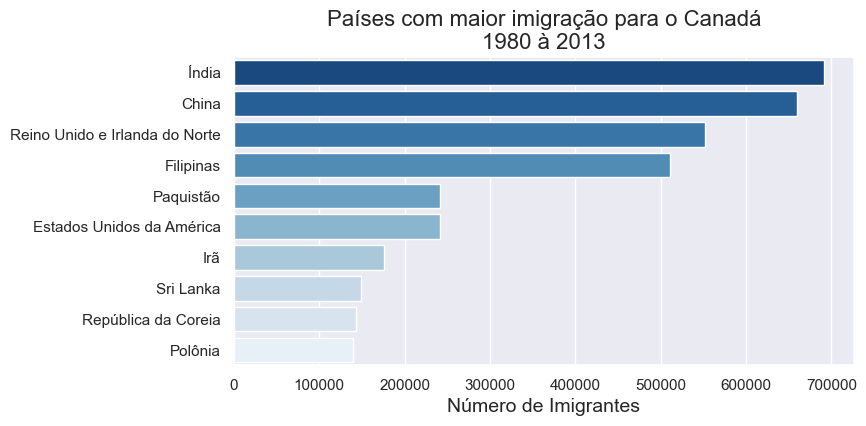

In [120]:
gerar_paleta('Blues_r')

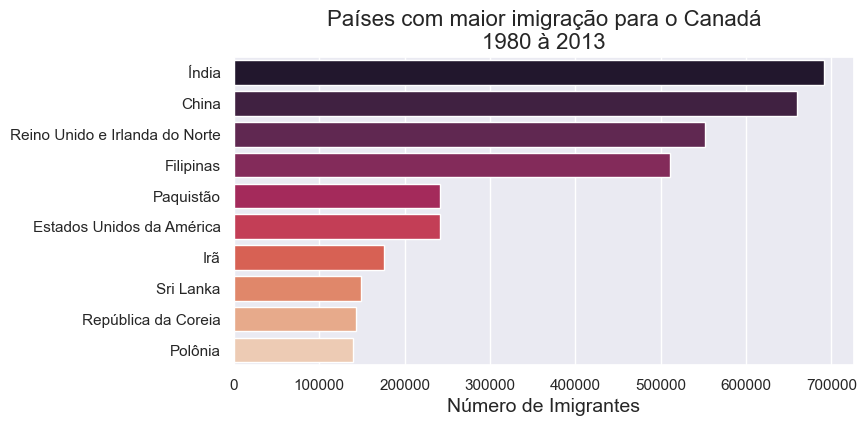

In [110]:
gerar_paleta('rocket')

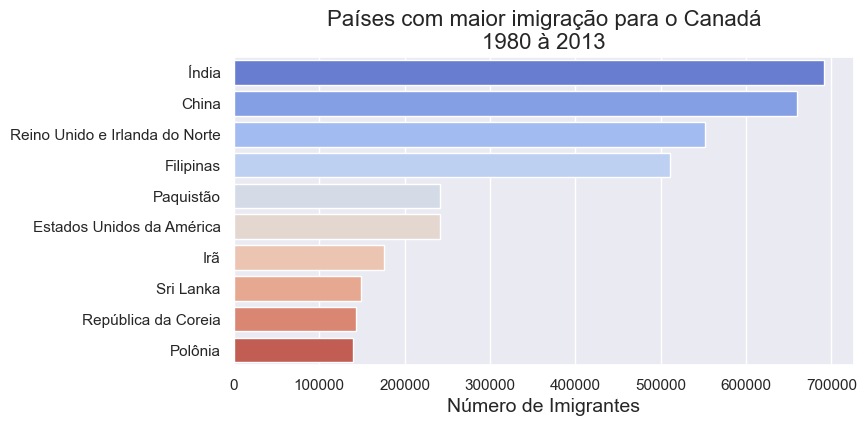

In [111]:
gerar_paleta('coolwarm')

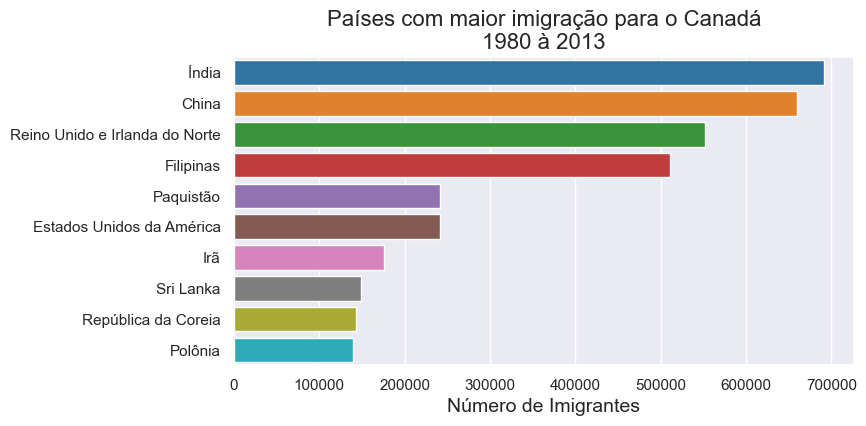

In [112]:
gerar_paleta('tab10')